In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':200000000,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Commodities'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 70, 20)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-04-23 to 2019-07-02 - 28'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 8) & (stat['shrp'] > 0.4)]
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
PHYS,30,4.748886,3.612003,1.270806,2.631572
GLD,30,4.437626,3.426029,1.248937,2.667662
SGOL,30,4.451038,3.450076,1.244120,2.692057
BAR,30,4.421840,3.436865,1.240407,2.700990
GLDM,30,4.429662,3.468255,1.231435,2.746475
IAU,30,4.446399,3.483991,1.230677,2.716592
DBA,30,2.888229,2.555572,1.068058,5.528548
CEF,30,3.633739,3.466767,1.002377,2.663438
GLTR,30,3.304593,3.993578,0.787730,3.584793


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(2)

['PHYS'] 0.055508295812429775 0.8 0.5263144685950855 1.2708061727826556
['PHYS', 'DBA'] -0.5083098336599531 -0.054889756641377074 0.8160120000042005 1.1694320770227766
['GLD', 'DBA'] -0.5465666730183193 -0.10768994745920846 0.8196209290796279 1.1584976546387389


['GLD', 'DBA']

In [5]:
quote.setup_mask(['GLD', 'DBA'])
quote.find_optimal_ratio()

({'GLD': 0.46, 'DBA': 0.54}, 3.5983, 1.9783, 1.7387)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,30.0,3.597466,1.978235,-0.728263,2.562288,4.293980,4.897473,6.189151,1.738285,2.352525
GLD,30.0,4.437626,3.426029,-0.272272,2.222587,3.903566,6.514119,11.065129,1.248937,2.667662
DBA,30.0,2.888229,2.555572,-1.518834,0.550932,3.185664,4.790743,7.138261,1.068058,5.528548


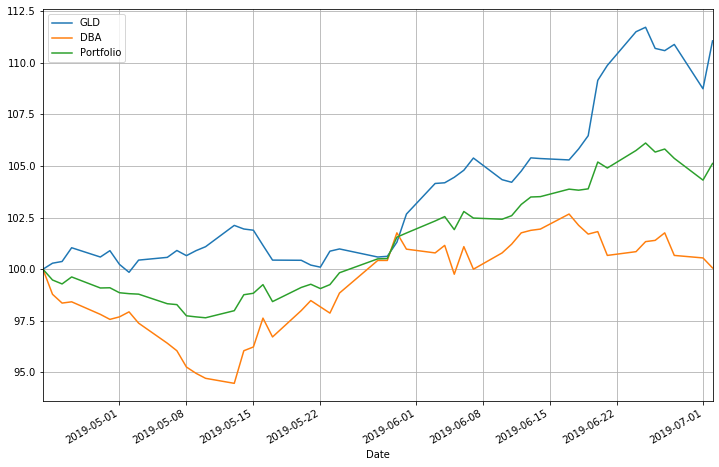

In [6]:
%pylab inline
quote.setup_mask(['GLD', 'DBA'])
quote.graph({'GLD': 0.46, 'DBA': 0.54})